# Exploratory Data Analysis (EDA)
Within the crisp-dm framework this can be seen as `Explore data`

## Overview
This EDA aims to provide a comprehensive first look at the ART500K Toy Dataset, assessing its structure, basic statistics, distributions, relationships, potential data quality issues, and initial implications for downstream modeling. All findings here will inform both the data preparation phase and modeling choices.

## Loading packages

In [ ]:
import pandas as pd
import os

import cv2
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap


SEED=42

## Importing data

In [81]:
image_dir = '../data/toy_dataset/'

labels_path = '../data/toy_dataset_label.csv'

df = pd.read_csv(labels_path, sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43455 entries, 0 to 43454
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         43455 non-null  int64 
 1   FILE       43454 non-null  object
 2   AUTHOR     43455 non-null  object
 3   BORN-DIED  43455 non-null  object
 4   TITLE      43455 non-null  object
 5   DATE       43455 non-null  object
 6   TECHNIQUE  43455 non-null  object
 7   LOCATION   43455 non-null  object
 8   FORM       43455 non-null  object
 9   TYPE       43455 non-null  object
 10  SCHOOL     43455 non-null  object
 11  TIMELINE   43455 non-null  object
 12  URL        43455 non-null  object
dtypes: int64(1), object(12)
memory usage: 4.3+ MB


In [82]:
df.sample(n=3)

,ID,FILE,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,FORM,TYPE,SCHOOL,TIMELINE,URL
12439,12440,12440.jpg,"DÜRER, Albrecht","(b. 1471, Nürnberg, d. 1528, Nürnberg)",Willow Mill,1496-98,"Watercolour and gouache on paper, 251 x 367 mm","Bibliothèque Nationale, Paris",graphics,landscape,German,1501-1550,http://www.wga.hu/html/d/durer/2/16/1/15willow...
4206,4207,4207.jpg,"BIANCHI, Mosè","(b. 1840, Monza, d. 1904, Monza)",Street Scene,-,"Oil on panel, 34 x 25 cm",Private collection,painting,landscape,Italian,1851-1900,http://www.wga.hu/html/b/bianchi1/bianchi2.html
5653,5654,5654.jpg,"BRAY, Jan de","(b. ca. 1627, Haarlem, d. 1697, Haarlem)",Portrait of a Man Seated at a Table in his Study,-,"Oil on oak panel, 41 x 33 cm",Private collection,painting,portrait,Dutch,1651-1700,http://www.wga.hu/html/b/bray/jan/port_man.html


In [83]:
df.isnull().sum()

ID           0
FILE         1
AUTHOR       0
BORN-DIED    0
TITLE        0
DATE         0
TECHNIQUE    0
LOCATION     0
FORM         0
TYPE         0
SCHOOL       0
TIMELINE     0
URL          0
dtype: int64

The csv is loaded into the dataframe with the correct count of rows except for the FILE row. This is missing one value.
Due to time constraint this row will be dropped for this iteration

In [84]:
df = df.dropna(subset=['FILE'])

The columns match the stated columns in `/02_describe_data.md`

The image path will be added to the dataframe to easily load images when needed

In [85]:
df['IMAGE_PATH'] = df['FILE'].apply(lambda x: os.path.join(image_dir, x))

missing_images = df[~df['IMAGE_PATH'].apply(os.path.exists)]
print(f"Number of missing image files: {len(missing_images)}")

Number of missing image files: 2


In [86]:
print(display(missing_images))

,ID,FILE,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,FORM,TYPE,SCHOOL,TIMELINE,URL,IMAGE_PATH
19561,19562,19562.jpg,"HUNT, William Holman","(b. 1827, London, d. 1910, London)",The Lady of Shalott (detail),1886-1905,Oil on canvas,"Wadsworth Atheneum, Hartford",painting,other,English,1801-1850,http://www.wga.hu/html/h/hunt/y_lady183c.html,../data/toy_dataset/19562.jpg
21911,21912,21912.jpg,"LISSE, Dirck van der","(b. 1607, Breda, d. 1669, Den Haag)",Landscape with Diana and Actaeon,-,"Oil on panel, 35 x 47 cm",Private collection,painting,landscape,Dutch,1601-1650,http://www.wga.hu/html/l/lisse/lisse_c.html,../data/toy_dataset/21912.jpg


None


In [87]:
df = df.drop(missing_images.index).reset_index(drop=True)

These two rows do not exist in the toy_dataset folder. After a manual check this is confirmed twice. These two rows will be dropped from the dataframe due to time contraint

## Data completeness and types
In the following code blocks there will be a check on how complete the data is and what is consists of and if the types need to be refined

In [88]:
df.sample(n=6)

,ID,FILE,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,FORM,TYPE,SCHOOL,TIMELINE,URL,IMAGE_PATH
42619,42622,42622.jpg,"WET, Jacob Willemsz. de, the Elder","(b. ca. 1610, Haarlem, d. 1675, Haarlem)",The Triumph of Mordechai,-,"Oil on panel, 58 x 83 cm",Private collection,painting,religious,Dutch,1601-1650,http://www.wga.hu/html/w/wet_j/mordecha.html,../data/toy_dataset/42622.jpg
32792,32795,32795.jpg,REMBRANDT Harmenszoon van Rijn,"(b. 1606, Leiden, d. 1669, Amsterdam)",Woman carrying a child,c. 1636,"Quill pen and brown ink, 103 x 86 mm","Museum het Rembrandthuis, Amsterdam",graphics,study,Dutch,1601-1650,http://www.wga.hu/html/r/rembrand/53drawin/5/1...,../data/toy_dataset/32795.jpg
12865,12866,12866.jpg,"EYCK, Jan van","(b. before 1395, Maaseik, d. before 1441, Bruges)",Portrait of Giovanni Arnolfini and his Wife (d...,1434,Oil on oak,"National Gallery, London",painting,portrait,Flemish,1401-1450,http://www.wga.hu/html/e/eyck_van/jan/15arnolf...,../data/toy_dataset/12866.jpg
20236,20238,20238.jpg,"KEYSER, Thomas de","(b. 1596/97, Amsterdam, d. 1667, Amsterdam)",Portrait of a Gentleman,1629,"Oil on panel, 68 x 49 cm",Private collection,painting,portrait,Dutch,1601-1650,http://www.wga.hu/html/k/keyser/thomas/portgen...,../data/toy_dataset/20238.jpg
6276,6277,6277.jpg,"BRUEGHEL, Pieter III","(b. 1589, Antwerpen, d. after 1608)",Allegory of Spring,-,"Oil on copper, 29 x 35 cm",Private collection,painting,mythological,Flemish,1601-1650,http://www.wga.hu/html/b/bruegel/pieter_z/spri...,../data/toy_dataset/6277.jpg
30389,30392,30392.jpg,PINTURICCHIO,"(b. ca. 1454, Perugia, d. 1513, Siena)",Four Enthroned Sibyls,1501,Fresco,"Collegiata di Santa Maria Maggiore, Spello",painting,religious,Italian,1451-1500,http://www.wga.hu/html/p/pinturic/baglioni/4va...,../data/toy_dataset/30392.jpg


With this sample there is a good sense of how the data looks like, the column ID clearly shows integers and is not expected to deviate. The FILE, AUTHOR, TITLE are good as string(object) types

now the unique values for the rows will be printed together with a percentage of how unique they are to find categorical types

In [89]:
for col in df.columns:
    unique_count = df[col].nunique()
    total_count = len(df)
    print(f"{col}: {unique_count} unique values ({unique_count/total_count:.2%} of {total_count})")

ID: 43452 unique values (100.00% of 43452)
FILE: 43452 unique values (100.00% of 43452)
AUTHOR: 4991 unique values (11.49% of 43452)
BORN-DIED: 7151 unique values (16.46% of 43452)
TITLE: 27090 unique values (62.34% of 43452)
DATE: 4958 unique values (11.41% of 43452)
TECHNIQUE: 21437 unique values (49.33% of 43452)
LOCATION: 4064 unique values (9.35% of 43452)
FORM: 13 unique values (0.03% of 43452)
TYPE: 10 unique values (0.02% of 43452)
SCHOOL: 26 unique values (0.06% of 43452)
TIMELINE: 24 unique values (0.06% of 43452)
URL: 43452 unique values (100.00% of 43452)
IMAGE_PATH: 43452 unique values (100.00% of 43452)


The columns `FORM`, `TYPE`, `SCHOOL`, `TIMELINE` and `LOCATION` show they do not occur many times in the dataframe and going from the column name itself it would be logical if these are categories

In [90]:
categorical_columns = ['FORM', 'TYPE', 'SCHOOL', 'TIMELINE', 'LOCATION']

for col in categorical_columns:
    print(f"Unique values in {col} before cleaning:")
    print(df[col].unique())
    print("\n")

Unique values in FORM before cleaning:
['painting' 'ceramics' 'sculpture' 'graphics' 'architecture'
 'stained-glass' 'metalwork' 'illumination' 'mosaic' 'others' 'furniture'
 'tapestry' 'glassware']


Unique values in TYPE before cleaning:
['mythological' 'genre' 'portrait' 'landscape' 'religious' 'other'
 'historical' 'interior' 'still-life' 'study']


Unique values in SCHOOL before cleaning:
['German' 'Danish' 'Spanish' 'French' 'Italian' 'Dutch' 'Scottish'
 'Flemish' 'Netherlandish' 'Swiss' 'Russian' 'Greek' 'Other' 'American'
 'English' 'Austrian' 'Portuguese' 'Bohemian' 'Catalan' 'Hungarian'
 'Irish' 'Norwegian' 'Polish' 'Swedish' 'Belgian' 'Finnish']


Unique values in TIMELINE before cleaning:
['1601-1650' '1851-1900' '1451-1500' '1501-1550' '1751-1800' '1551-1600'
 '1801-1850' '1701-1750' '1651-1700' '1301-1350' '1401-1450' '1351-1400'
 '1151-1200' '1251-1300' '1101-1150' '1001-1050' '1201-1250' '1051-1100'
 '0801-0850' '0751-0800' '0851-0900' '0951-1000' '0701-0750' '0901-0950

All columns are clean without duplicates, `LOCATION` has to be inspected further to check if there are differences in the values that should be the same but are not

In [91]:
def LOCATION_normalized_against_variants():
    locations_normalized = df['LOCATION'].str.lower().str.strip()

    # Group original variants by normalized form
    groups = df.groupby(locations_normalized)['LOCATION'].apply(list)

    # Filter groups with more than one distinct variant
    groups_with_variants = groups[groups.apply(lambda x: len(set(x)) > 1)]

    # Display the normalized key and its variants
    for norm_loc, variants in groups_with_variants.items():
        print(f"Normalized: '{norm_loc}'")
        print(f"Variants: {set(variants)}\n")

LOCATION_normalized_against_variants()

Normalized: 'akademie der bildenden künste, vienna'
Variants: {'Akademie der bildenden Künste, Vienna', 'Akademie der Bildenden Künste, Vienna'}

Normalized: 'museum boijmans van beuningen, rotterdam'
Variants: {'Museum Boijmans Van Beuningen, Rotterdam', 'Museum Boijmans van Beuningen, Rotterdam'}

Normalized: 'museum der bildenden künste, leipzig'
Variants: {'Museum der Bildenden Künste, Leipzig', 'Museum der bildenden Künste, Leipzig'}

Normalized: 'museum of modern art, new york'
Variants: {'Museum of Modern Art, new York', 'Museum of Modern Art, New York'}

Normalized: 'musée cantonal des beaux-arts, lausanne'
Variants: {'Musée cantonal des Beaux-Arts, Lausanne', 'Musée Cantonal des Beaux-Arts, Lausanne'}

Normalized: 'musée d'art et d'histoire, geneva'
Variants: {"Musée d'art et d'histoire, Geneva", "Musée d'Art et d'Histoire, Geneva"}

Normalized: 'musée des arts décoratifs, paris'
Variants: {'Musée des Arts décoratifs, Paris', 'Musée des Arts Décoratifs, Paris'}

Normalized: 'm

As can be seen above there can be small variations between usage of capital letters. To keep as close as possible to the original place and name of location the most used version will be used as a replacement when there are multiple versions

In [92]:
locations_normalized = df['LOCATION'].str.strip().str.lower()

# Group original variants by normalized form
groups = df.groupby(locations_normalized)['LOCATION'].apply(list)

# Get the most frequent variant (mode) in each group
def most_frequent_variant(variants):
    return pd.Series(variants).mode()[0]

canonical_locations = groups.apply(most_frequent_variant)

# Overwrite LOCATION by mapping normalized to canonical variant
df['LOCATION'] = locations_normalized.map(canonical_locations)

In [93]:
LOCATION_normalized_against_variants()

No output for the function

Now the top 3 values for each categorie will be printed

In [94]:
top = 3

for col in categorical_columns:
    print(f"\nTop {top} values for '{col}':")
    counts = df[col].value_counts().head(top)
    for idx, (val, count) in enumerate(counts.items(), 1):
        print(f"  {idx}. {val}: {count}")


Top 3 values for 'FORM':
  1. painting: 30003
  2. sculpture: 4766
  3. graphics: 3813

Top 3 values for 'TYPE':
  1. religious: 17838
  2. portrait: 5640
  3. landscape: 4341

Top 3 values for 'SCHOOL':
  1. Italian: 18150
  2. French: 6804
  3. Dutch: 5059

Top 3 values for 'TIMELINE':
  1. 1501-1550: 6327
  2. 1601-1650: 6115
  3. 1451-1500: 5181

Top 3 values for 'LOCATION':
  1. Private collection: 5705
  2. Musée du Louvre, Paris: 1790
  3. The Hermitage, St. Petersburg: 1313


From these outputs the conclusion can be made that these can be seen as categories. The values will also be stripped of any leading and trailing whitespace if there is any

In [95]:
categorical_cols = ['FORM', 'TYPE', 'SCHOOL', 'TIMELINE', 'LOCATION']

for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip()
    df[col] = df[col].astype('category')
    print(f"Number of unique values for column {col}: {df[col].nunique()}")

Number of unique values for column FORM: 13
Number of unique values for column TYPE: 10
Number of unique values for column SCHOOL: 26
Number of unique values for column TIMELINE: 24
Number of unique values for column LOCATION: 4055


When looking at the sample output above the `TECHNIQUE` column could possibly be a categorie but due to extra information about sizes this is not a clean category without dissecting the column. Due to time constraint this column will be dropped in this iteration

The `BORD-DIED` column shows a string that has to be dissected into multiple columns. The values in the rows are not always according to the same format, due to this the decision will be made to drop this column in this iteration

In [96]:
df = df.drop(['TECHNIQUE', 'BORN-DIED'], axis=1)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43452 entries, 0 to 43451
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          43452 non-null  int64   
 1   FILE        43452 non-null  object  
 2   AUTHOR      43452 non-null  object  
 3   TITLE       43452 non-null  object  
 4   DATE        43452 non-null  object  
 5   LOCATION    43452 non-null  category
 6   FORM        43452 non-null  category
 7   TYPE        43452 non-null  category
 8   SCHOOL      43452 non-null  category
 9   TIMELINE    43452 non-null  category
 10  URL         43452 non-null  object  
 11  IMAGE_PATH  43452 non-null  object  
dtypes: category(5), int64(1), object(6)
memory usage: 2.7+ MB


### Number of images and labels
Check to verify if the surface level data description is correct

In [98]:
image_files = set(os.listdir(image_dir))
metadata_files = set(df['FILE'])

# Images with metadata
matched_images = image_files & metadata_files

# Images missing in metadata
missing_in_metadata = image_files - metadata_files

# Metadata missing images
missing_images = metadata_files - image_files

print(f"Matched images: {len(matched_images)}")
print(f"Images not in metadata: {len(missing_in_metadata)}")
print(f"Metadata entries with missing image: {len(missing_images)}")

Matched images: 43452
Images not in metadata: 1
Metadata entries with missing image: 0


There is a mismatch between the existing labels and the images in the dataset (might be solved by dropping 2 images and one null value?)

*Exploring the basic features and cleaning what is needed will be halted here to continue with the visualization*

## Image data
In the preview of the images via the local folder it could be seen that the images are of various sizes, now a sample of the images will be loaded in the notebook to inspect and verify this

In [99]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

In [100]:
img_validation_df = df.sample(n=100, random_state=SEED).copy()

widths, heights, bad = [], [], []
for path in img_validation_df['IMAGE_PATH']:
    try:
        pure_path = Path(path)
        with Image.open(pure_path) as img:
            w, h = img.size
        widths.append(w)
        heights.append(h)
    except Exception:
        bad.append(path)
        widths.append(None)
        heights.append(None)

img_validation_df['img_width'] = widths
img_validation_df['img_height'] = heights

print(f"Failed to open {len(bad)} images out of 100\n")
print(img_validation_df[['img_width', 'img_height']].describe())

Failed to open 0 images out of 100

         img_width   img_height
count   100.000000   100.000000
mean    916.820000  1058.060000
std     229.528959   224.932934
min     400.000000   600.000000
25%     763.750000   900.000000
50%     900.000000  1024.000000
75%    1082.750000  1200.000000
max    1455.000000  1600.000000


All images loaded succesfully. There is a difference in sizes

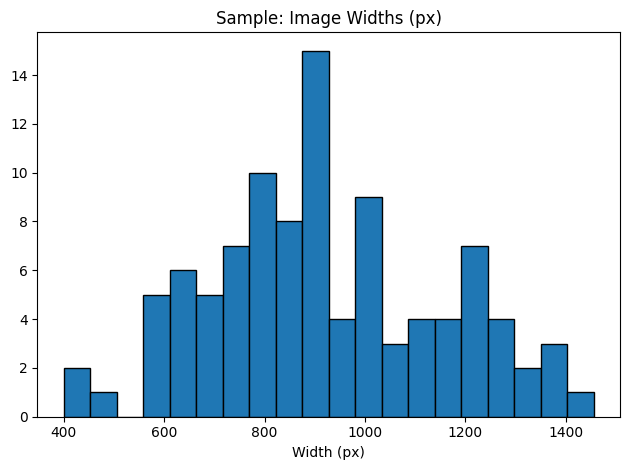

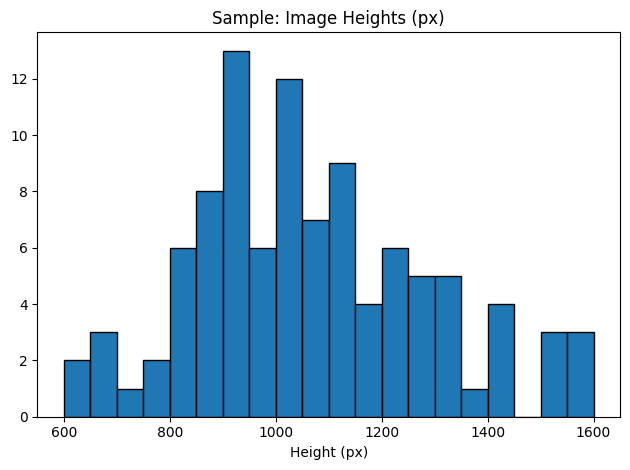

In [101]:
plt.figure()
plt.hist(
    img_validation_df['img_width'].dropna(),
    bins=20,
    edgecolor='black',
    linewidth=1
)
plt.title('Sample: Image Widths (px)')
plt.xlabel('Width (px)')
plt.tight_layout()

plt.figure()

plt.hist(
    img_validation_df['img_height'].dropna(),
    bins=20,
    edgecolor='black',
    linewidth=1
)
plt.title('Sample: Image Heights (px)')
plt.xlabel('Height (px)')
plt.tight_layout()

plt.show()

The histogram shows a variety in image widths and heights, this needs to be normalised before usage

## Visualization

### Bar plots

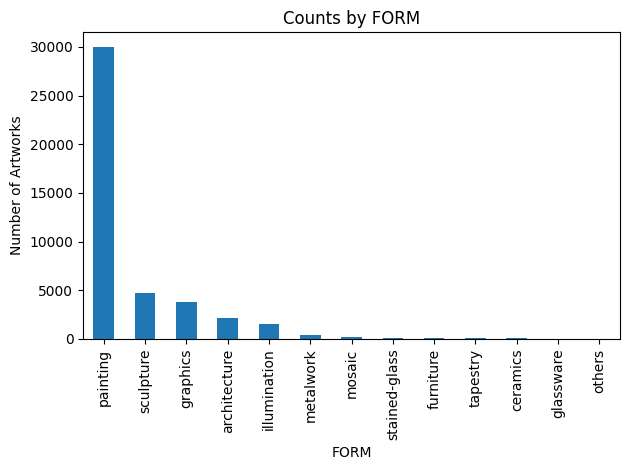

In [102]:
plt.figure()
df['FORM'].value_counts().plot.bar()
plt.title('Counts by FORM')
plt.ylabel('Number of Artworks')
plt.tight_layout()

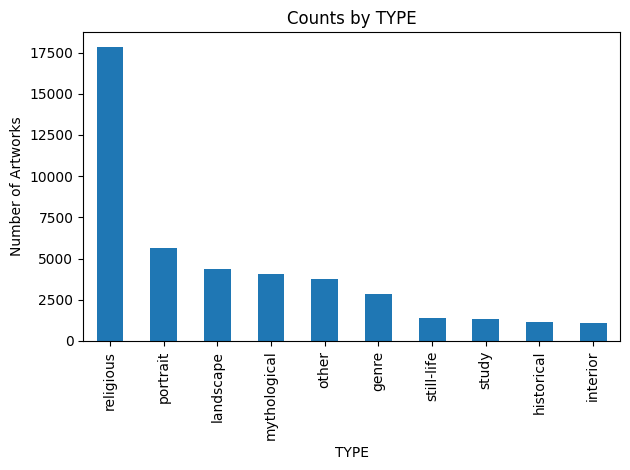

In [103]:
plt.figure()
df['TYPE'].value_counts().plot.bar()
plt.title('Counts by TYPE')
plt.ylabel('Number of Artworks')
plt.tight_layout()

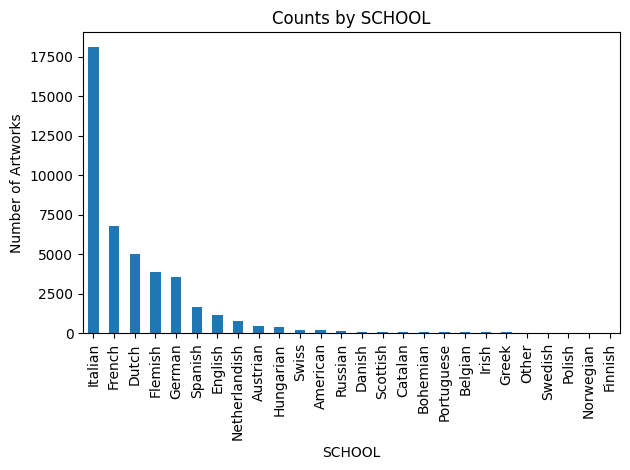

In [104]:
plt.figure()
df['SCHOOL'].value_counts().plot.bar()
plt.title('Counts by SCHOOL')
plt.ylabel('Number of Artworks')
plt.tight_layout()

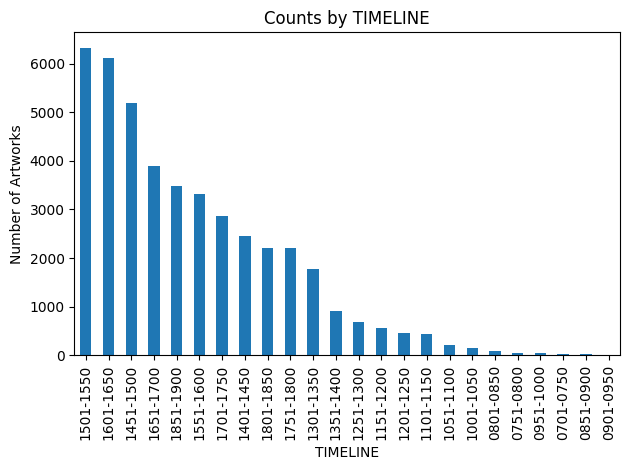

In [105]:
plt.figure()
df['TIMELINE'].value_counts().plot.bar()
plt.title('Counts by TIMELINE')
plt.ylabel('Number of Artworks')
plt.tight_layout()

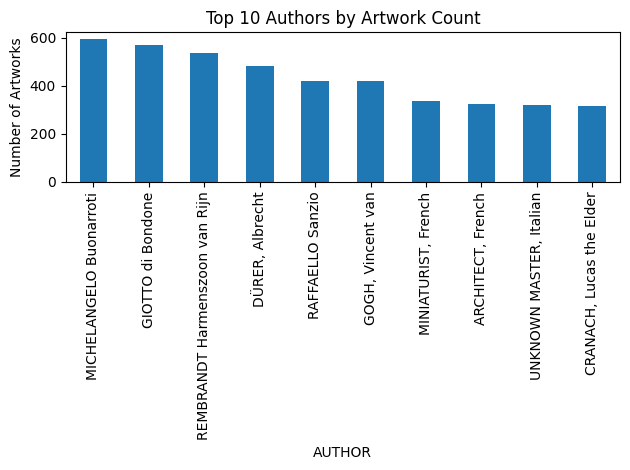

In [106]:
plt.figure()
df['AUTHOR'].value_counts().head(10).plot.bar()
plt.title('Top 10 Authors by Artwork Count')
plt.ylabel('Number of Artworks')
plt.tight_layout()

### Histogram

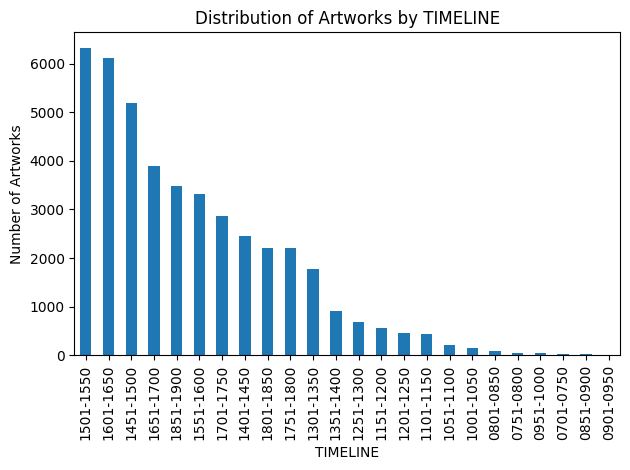

In [107]:
plt.figure()
df['TIMELINE'].value_counts().plot.bar()
plt.title('Distribution of Artworks by TIMELINE')
plt.xlabel('TIMELINE')
plt.ylabel('Number of Artworks')
plt.tight_layout()
plt.show()

# SUNBURST does not render?

In [108]:
import plotly.express as px

top_locations = df['LOCATION'].value_counts().nlargest(2).index
top_types = df['TYPE'].value_counts().nlargest(3).index
top_timelines = df['TIMELINE'].value_counts().nlargest(3).index

filtered_df = df[
    df['LOCATION'].isin(top_locations) &
    df['TYPE'].isin(top_types) &
    df['TIMELINE'].isin(top_timelines)
]

agg_df = (
    filtered_df
    .groupby(['LOCATION', 'TYPE', 'TIMELINE'], observed=True)
    .size()
    .reset_index(name='COUNT')
)

print("Agg_df", agg_df.shape)
print("filter_df shape", filtered_df.shape)

Agg_df (16, 4)
filter_df shape (1500, 12)


In [109]:
print(agg_df.head())

                 LOCATION       TYPE   TIMELINE  COUNT
0  Musée du Louvre, Paris  landscape  1501-1550      2
1  Musée du Louvre, Paris  landscape  1601-1650     33
2  Musée du Louvre, Paris   portrait  1451-1500     33
3  Musée du Louvre, Paris   portrait  1501-1550     41
4  Musée du Louvre, Paris   portrait  1601-1650     41


In [110]:
# fig = px.sunburst(
#     agg_df,
#     path=['LOCATION', 'TYPE', 'TIMELINE'],
#     values='COUNT',
#     title='Artworks by Location, Type, and Timeline (Top 3 of Each)',
#     width=1200, height=800
# )

# # fig.show()
# fig.write_html("sunburst.html", include_plotlyjs='inline', full_html=True)

In [111]:
df.sample(n=10)

,ID,FILE,AUTHOR,TITLE,DATE,LOCATION,FORM,TYPE,SCHOOL,TIMELINE,URL,IMAGE_PATH
37727,37730,37730.jpg,"TIEPOLO, Giovanni Battista",The Meeting of Antony and Cleopatra (detail),1743-50,"Palazzo Labia, Venice",painting,historical,Italian,1701-1750,http://www.wga.hu/html/t/tiepolo/gianbatt/4lab...,../data/toy_dataset/37730.jpg
88,89,89.jpg,"AELST, Willem van","Still-Life with Fruit, Parrot, and Nautilus Pi...",1653,"Galleria Palatina (Palazzo Pitti), Florence",painting,still-life,Dutch,1651-1700,http://www.wga.hu/html/a/aelst/stillpar.html,../data/toy_dataset/89.jpg
20809,20811,20811.jpg,"LAZZARINI, Gregorio",Orpheus and the Bacchantes (detail),c. 1710,"Museo del Settecento Veneziano, Ca' Rezzonico,...",painting,mythological,Italian,1651-1700,http://www.wga.hu/html/l/lazzarin/orpheus2.html,../data/toy_dataset/20811.jpg
8312,8313,8313.jpg,"CHEERE, Sir Henry","Monument to Robert, 19th Earl of Kildare",-,"Christ Church Cathedral, Dublin",sculpture,religious,English,1701-1750,http://www.wga.hu/html/c/cheere/henry/kildare....,../data/toy_dataset/8313.jpg
8137,8138,8138.jpg,"CÉZANNE, Paul",Still-Life with a Curtain,1895,"The Hermitage, St. Petersburg",painting,still-life,French,1851-1900,http://www.wga.hu/html/c/cezanne/4/4still4.html,../data/toy_dataset/8138.jpg
3620,3621,3621.jpg,"BELLINI, Giovanni",Pietà,1505,"Gallerie dell'Accademia, Venice",painting,religious,Italian,1451-1500,http://www.wga.hu/html/b/bellini/giovanni/1500...,../data/toy_dataset/3621.jpg
8124,8125,8125.jpg,"CÉZANNE, Paul",Mont Sainte-Victoire,1890-94,"National Gallery of Scotland, Edinburgh",painting,landscape,French,1851-1900,http://www.wga.hu/html/c/cezanne/4/3lands01.html,../data/toy_dataset/8125.jpg
4631,4632,4632.jpg,"BON, Bartolomeo",St Francis,-,"Santa Maria Gloriosa dei Frari, Venice",sculpture,religious,Italian,1401-1450,http://www.wga.hu/html/b/bon/bartolom/frari1.html,../data/toy_dataset/4632.jpg
37237,37240,37240.jpg,TANZIO DA VARALLO,St Jerome,1624-26,"Nelson-Atkins Museum of Art, Kansas City",painting,religious,Italian,1601-1650,http://www.wga.hu/html/t/tanzio/jerome.html,../data/toy_dataset/37240.jpg
30732,30735,30735.jpg,"PITTONI, Giambattista",David and Bathsheba,-,Private collection,painting,religious,Italian,1701-1750,http://www.wga.hu/html/p/pittoni/david_ba.html,../data/toy_dataset/30735.jpg


# Clustering of the images

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43452 entries, 0 to 43451
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          43452 non-null  int64   
 1   FILE        43452 non-null  object  
 2   AUTHOR      43452 non-null  object  
 3   TITLE       43452 non-null  object  
 4   DATE        43452 non-null  object  
 5   LOCATION    43452 non-null  category
 6   FORM        43452 non-null  category
 7   TYPE        43452 non-null  category
 8   SCHOOL      43452 non-null  category
 9   TIMELINE    43452 non-null  category
 10  URL         43452 non-null  object  
 11  IMAGE_PATH  43452 non-null  object  
dtypes: category(5), int64(1), object(6)
memory usage: 2.7+ MB


The dataframe will be filtered to only include paintings. The df will also be filtered to only include the 4 defined TYPES in the previous iteration. For a first visualiztion the amount of samples per type will be set to 500


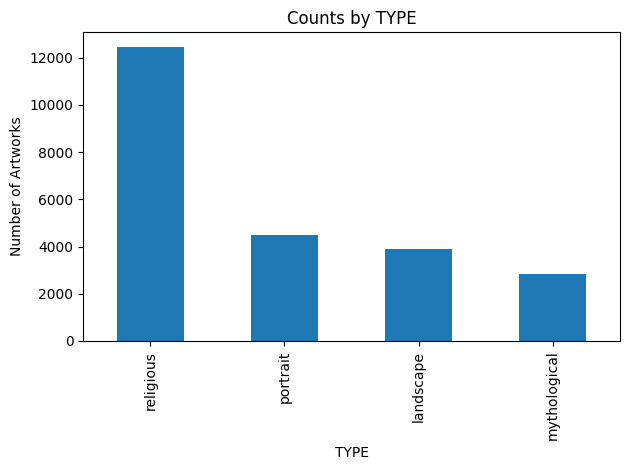

In [113]:
types_to_keep = ['religious', 'portrait', 'landscape', 'mythological']

df_filtered = df[df['TYPE'].isin(types_to_keep)]

df_filtered = df_filtered[
    (df_filtered['FORM'] == 'painting') &
    (df_filtered['TYPE'].isin(types_to_keep))
]

df_filtered['TYPE'] = df_filtered['TYPE'].cat.remove_unused_categories()

plt.figure()
df_filtered['TYPE'].value_counts().plot.bar()
plt.title('Counts by TYPE')
plt.ylabel('Number of Artworks')
plt.tight_layout()

In [114]:
n_samples = 500

# 500 random samples from each TYPE
df_filtered = df_filtered.groupby('TYPE', group_keys=False).apply(lambda x: x.sample(n=n_samples, random_state=SEED))

C:\Users\laure\AppData\Local\Temp\ipykernel_21240\3518896864.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtered = df_filtered.groupby('TYPE', group_keys=False).apply(lambda x: x.sample(n=n_samples, random_state=SEED))


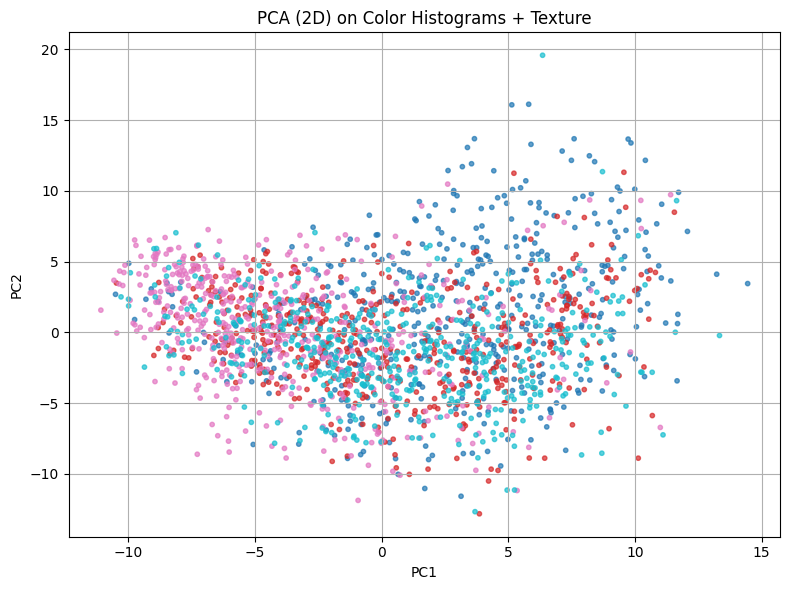

In [ ]:
# clustering artworks based on embeddings (maybe visible clusters related to form or type?

features = []
for img_path in df_filtered['IMAGE_PATH'].tolist():
    # a) Read image and convert to RGB
    img_bgr = cv2.imread(img_path)
    if img_bgr is None:
        # handle missing/corrupt images if needed
        features.append(np.zeros(32*3 + 1, dtype=float))
        continue
    img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # b) Color histogram (32 bins per channel, normalized)
    hist_list = []
    for chan in range(3):
        h = cv2.calcHist([img], [chan], None, [32], [0, 256])
        h = h.flatten()
        hist_list.append(h)
    color_hist = np.concatenate(hist_list)
    color_hist = color_hist / (color_hist.sum() + 1e-6)

    # c) Texture descriptor: variance of Laplacian (focus/edge metric)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    lap = cv2.Laplacian(gray, cv2.CV_64F)
    texture_feat = np.array([lap.var()])

    # d) Combine
    feat = np.hstack([color_hist, texture_feat])
    features.append(feat)

X = np.vstack(features)  # shape = (n_images, 32*3 + 1)

# ── 3. Dimensionality reduction via PCA ──
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# then PCA
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_scaled)

# ── 4. 2D scatter plot ──
plt.figure(figsize=(8, 6))
labels = df_filtered['TYPE'].astype('category').cat.codes
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels, cmap='tab10', s=10, alpha=0.7)
plt.title("PCA (2D) on Color Histograms + Texture")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()

There is a lot of overlap over types. even after the scaling appleid there is no real big difference over the 4 chosen types
The dark blue type is very scatterd. The pink type is slightly more clustered toward the left of the PCA.

UMAP can be tried as a non linear reducer

C:\Users\laure\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


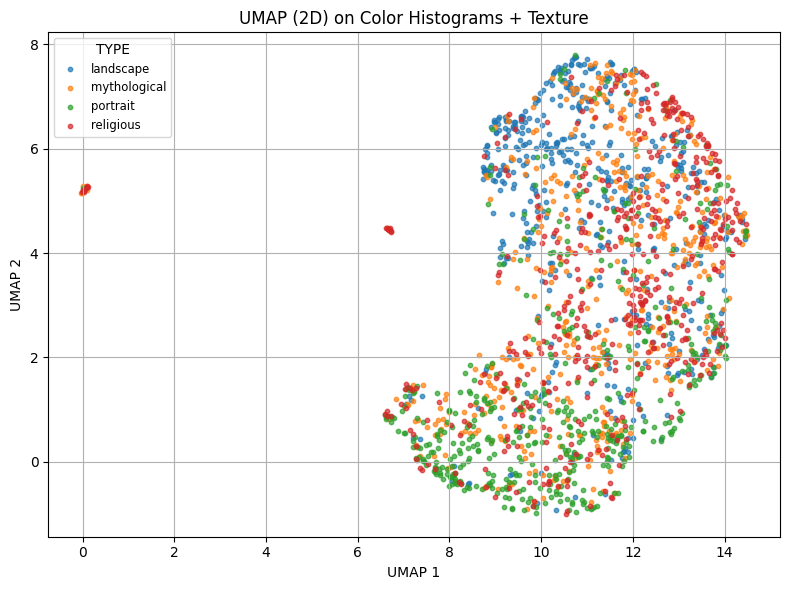

In [ ]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# 2) Prepare for per‐TYPE plotting
type_cats = df_filtered['TYPE'].cat.categories      # e.g. Index(['landscape','mythological','portrait','religious'],dtype=...)
type_codes = df_filtered['TYPE'].cat.codes          # integer codes 0…n_types-1
cmap = plt.get_cmap('tab10')                        # enough distinct colors for up to 10 types

# 3) Scatter one TYPE at a time
plt.figure(figsize=(8,6))
for code, tname in enumerate(type_cats):
    mask = (type_codes == code)
    plt.scatter(
        X_umap[mask, 0],
        X_umap[mask, 1],
        s=10,
        alpha=0.7,
        color=cmap(code),
        label=tname
    )

# 4) Legend & aesthetics
plt.legend(title='TYPE', loc='best', fontsize='small', frameon=True)
plt.title("UMAP (2D) on Color Histograms + Texture")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.grid(True)
plt.tight_layout()
plt.show()

There are still no clean semantic islands visible.
There are however more subtle gradients to be seen. landscapes are more common in the upper arm of the clustering. portraits on the other hand are more in the bottom part of the clustering

# Ideas for plotting

In [ ]:
# Grid where columns are the art form with example below the header
# Sankey diagram starting with the school to type and then form

To speed up the first iteration all other visualizations will be done in a future iteration.

# Conclusion

While the ART500K Toy Dataset provides a broad selection of artworks with categorical metadata for type, form, timeperiod, etc, it lacks explicit labels for fine grained art movements or curated collections. This makes direct modeling or analysis of movement level curation not feasible. Although the TIMELINE field could be used as a loose placeholder, this would introduce additional noise and does not substitute for explicit movement annotation.

Without a ground truth for collections, the fit check phase in this iteration will use synthetic groupings based on available metadata (type, period). The results will show technical feasibility for such groupings but is unlikely to capture the complexity of real curatorial practice. Outcomes from this prototype will be reviewed and lessons learned will inform if project objectives should be refined or rescoped in following iterations.

*Key EDA outcomes:*
- Absence of explicit movement or style labels.
- All label records are now reliably linked to existing image files, with irrelevant or ambiguous fields removed.
- Focusing on paintings (FORM) and four types with enough data availability (TYPE: religious, portrait, landscape, mythological) provides a relevant subset for the initial modeling phase.
- Normalization of categorical variables and removal of problematic columns reduces risk of mislabeling and improves data quality.
- Clsutering the visuals of the image together with the TYPES do not seem to make sense. There are no visible clusters

*Remaining challenges:*
- Variation in image sizes must be addressed in image preprocessing.
- Several metadata fields remain inconsistently formatted or unprocessed, and may require further cleaning or enrichment for future iterations.

*Feasibility:*
Despite these constraints the dataset supports meaningful prototyping of fit-checks and basic grouping based on the selected metadata fields. Insights from this first cycle will directly inform the direction and scope of future project work.